In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn

tf.random.set_seed(1)

# [Module 60 creating and viewing classification data to model](https://youtu.be/tpCFfeUEGs8?t=33008)

### types of classification problems:
1. binary
2. multi-class
3. multi-label

In [2]:
from sklearn.datasets import make_circles

# make 100 samples
n_samples = 1000

# create circles
x, y = make_circles(n_samples, noise=0.03, random_state=1)

In [3]:
# check out features and labels. Output is 1 or 0, so it's binary classification
print(x[:10])
print(y[:10])

[[ 0.83619806  0.03563148]
 [-0.53059757 -0.6487148 ]
 [ 0.85386881 -0.61156583]
 [-0.09214707 -0.9651441 ]
 [-1.00162344  0.14446653]
 [ 0.47605284 -0.61169413]
 [-0.96305328 -0.15441694]
 [-0.54158547 -0.5311938 ]
 [-0.70570924 -0.6354933 ]
 [ 0.83579856  0.580793  ]]
[1 1 0 0 0 1 0 1 0 0]


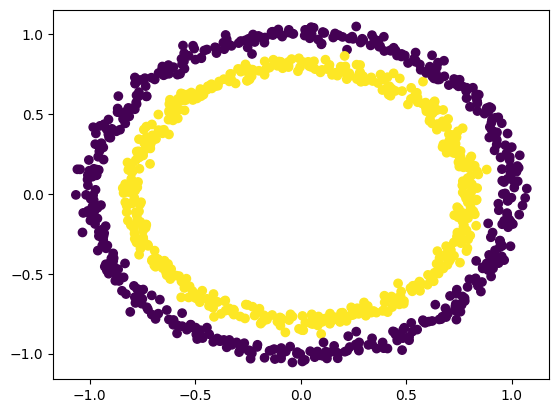

In [4]:
# put it in a dataframe for exploratory analysis
circles = pd.DataFrame({"x0": x[:, 0], "x1": x[:, 1], "label": y})
# print(circles)
plt.scatter(circles["x0"], circles["x1"], c=y)
plt.show()

# [Module 61 checking the input and output shapes of our NN](https://youtu.be/tpCFfeUEGs8?t=33699)

In [5]:
# shapes:
print(x.shape, y.shape)
print(len(x), len(y))
# first example of features and labels
print(x[0], y[0])

(1000, 2) (1000,)
1000 1000
[0.83619806 0.03563148] 1


### Steps in classification problem
1. turn data into tensors (done for this problem)
2. build model
3. fit model
4. evaluate model
5. tinker with model

# [Module 62 making a non very good NN](https://youtu.be/tpCFfeUEGs8?t=33977)

In [10]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# build model
model = tf.keras.models.Sequential(
    # tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
)
# compile
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),  # use BinaryCrossentropy() for binary classification
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])  # a good classification metric

# fit data
model.fit(x_train, y_train, epochs=100, verbose=0)

# evaluate
model.evaluate(x_test, y_test)

# this model sucks! It's as bad as random guessing

7/7 [==============================] - 0s 515us/step - loss: 7.9442 - accuracy: 0.4850


[7.9442057609558105, 0.48500001430511475]

In [9]:
# attempting a better model

# build
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])
# compile
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# fit
model2.fit(x_train, y_train, epochs=200, verbose=0)

# evaluate
model2.evaluate(x_test, y_test)
# this still sucks even with an added layer! I think changing activation function will help

7/7 [==============================] - 0s 838us/step - loss: 0.6942 - accuracy: 0.4950


[0.6941626071929932, 0.4950000047683716]

# [Module 63 Trying to improve the model](https://youtu.be/tpCFfeUEGs8?t=34708)

In [8]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation=None),
    tf.keras.layers.Dense(1, activation="relu")
])

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

model3.fit(x_train, y_train, epochs=100, verbose=0)

model3.evaluate(x_test, y_test)
# this model still sucks!


7/7 [==============================] - 0s 545us/step - loss: 0.6957 - accuracy: 0.4450


[0.695747435092926, 0.4449999928474426]

# [Module 64 visualizing our bad model](https://youtu.be/tpCFfeUEGs8?t=35262)

plot_decision_boundary() will
1. take in: trained model, x, y
2. create meshgrid of different x values
3. make predictions across the meshgrid
4. plot the predictions and a line between zones

In [11]:
def plot_decision_boundary(model, x, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html. # np.c_ translates slice objects to concat along the second axis, so [[1, 3], [2, 4]] -> [1,2,3,4]

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 247us/step
doing binary classifcation...


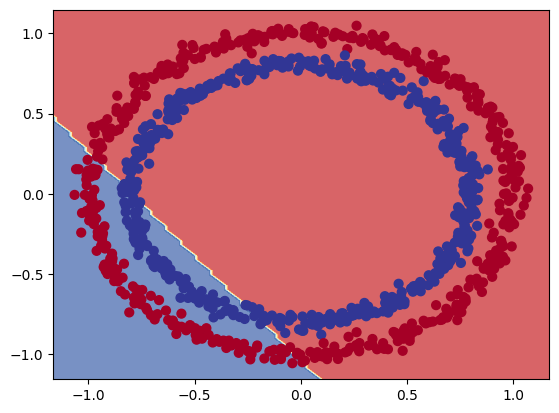

In [12]:
plot_decision_boundary(model3, x, y)
# now we can see why our model sucks, it's trying to make a linear decision boundary

# [Module 65 trying our bad (linear) model for a regression problem](https://youtu.be/tpCFfeUEGs8?t=36170)
### This is the final video in part 1! Over 10 hours in!

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 452.4111 - mae: 452.4111
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 409.1306 - mae: 409.1306
Epoch 3/100
5/5 [==============================] - 0s 871us/step - loss: 368.1123 - mae: 368.1123
Epoch 4/100
5/5 [==============================] - 0s 665us/step - loss: 324.6422 - mae: 324.6422
Epoch 5/100
5/5 [==============================] - 0s 565us/step - loss: 282.6800 - mae: 282.6800
Epoch 6/100
5/5 [==============================] - 0s 697us/step - loss: 239.3780 - mae: 239.3780
Epoch 7/100
5/5 [==============================] - 0s 643us/step - loss: 196.8514 - mae: 196.8514
Epoch 8/100
5/5 [==============================] - 0s 570us/step - loss: 152.2919 - mae: 152.2919
Epoch 9/100
5/5 [==============================] - 0s 554us/step - loss: 108.2236 - mae: 108.2236
Epoch 10/100
5/5 [==============================] - 0s 589us/step - loss: 63.7695 - mae: 63.7695
Epoch 11/100
5/5 [=======

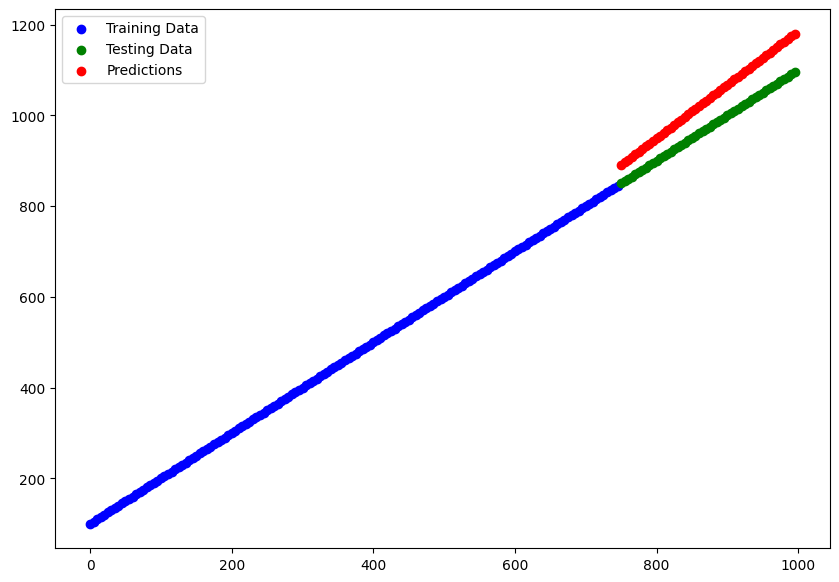

In [13]:
# create regression data
x = np.arange(0, 1000, 5)
y = x + 100

x_train, x_test = x[:150], x[150:]
y_train, y_test = y[:150], y[150:]

# fit it to the model
# model3.fit(x_train, y_train, epochs=100) # this has a shape issue because we made our model before for 2 inputs. binarycrossentropy doesn't make sense for regression

# let's make a better model
# design model
model4 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(1,)), # not sure why I needed to specify this here, but it's a good thing to try if I get shape errors
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# compile
model4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

# fit
model4.fit(x_train, y_train, epochs=100)

# make predictions
y_pred = model4.predict(x_test)

# plot predictions
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="blue", label="Training Data")
    plt.scatter(test_data, test_labels, c="green", label="Testing Data")
    plt.scatter(test_data, predictions, c="red", label="Predictions")
    plt.legend()
    plt.show()
plot_predictions(x_train, y_train, x_test, y_test, y_pred)